## Fashion MNIST - CNN v1
- 2 x Conv2D layers
- 1 MaxPooling2D layer
- 1 Dropout(2.5) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

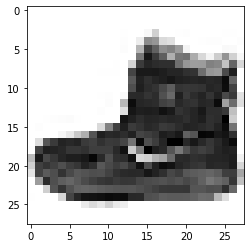

In [5]:
plt.imshow(X_train[0], cmap='Greys');

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

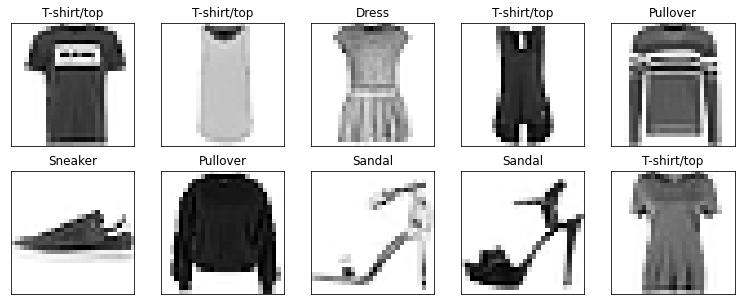

In [7]:
plt.figure(figsize=(13,5))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[y_train[i]])
    plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# X_train, X_test 정규화(0 ~ 1), 이미지 차원 변경: 2차원 --> 3차원
X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
# One hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

In [10]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [11]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [12]:
model_path = './models/best-fashion-mnist-cnn-v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [13]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
234/240 [============================>.] - ETA: 0s - loss: 0.5052 - accuracy: 0.8209
Epoch 00001: val_loss improved from inf to 0.32221, saving model to ./models\best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 5s 9ms/step - loss: 0.5020 - accuracy: 0.8221 - val_loss: 0.3222 - val_accuracy: 0.8830
Epoch 2/100
239/240 [============================>.] - ETA: 0s - loss: 0.3145 - accuracy: 0.8863
Epoch 00002: val_loss improved from 0.32221 to 0.27348, saving model to ./models\best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.3144 - accuracy: 0.8863 - val_loss: 0.2735 - val_accuracy: 0.9012
Epoch 3/100
235/240 [============================>.] - ETA: 0s - loss: 0.2613 - accuracy: 0.9060
Epoch 00003: val_loss improved from 0.27348 to 0.23903, saving model to ./models\best-fashion-mnist-cnn-v1.h5
240/240 [==============================] - 2s 8ms/step - loss: 0.2614 - accuracy: 0.9059 - val_loss: 0.2390 - val_accurac

In [14]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2156 - accuracy: 0.9265


[0.21564899384975433, 0.9265000224113464]

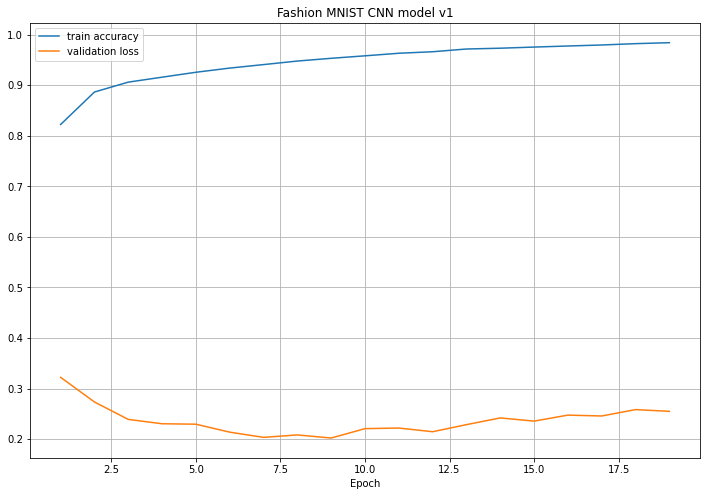

In [15]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('Fashion MNIST CNN model v1')
plt.show()

## Fashion MNIST - CNN v2
- 2 x Conv2D layers with padding
- 1 MaxPooling2D layer
- 1 Dropout(0.25) layer
- 1 FCN layer
- 1 Dropout(0.5) layer
- 1 Output layer

In [17]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(),                         # MaxPooling2D(pool_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               6423040   
                                                      

In [18]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [19]:
model_path = './models/best-fashion-mnist-cnn-v2.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [20]:
hist = model.fit(
    X_train, Y_train, validation_split=0.2, epochs=100, batch_size=200,
    callbacks=[mc, es]
)

Epoch 1/100
234/240 [============================>.] - ETA: 0s - loss: 0.4691 - accuracy: 0.8339
Epoch 00001: val_loss improved from inf to 0.29993, saving model to ./models\best-fashion-mnist-cnn-v2.h5
240/240 [==============================] - 3s 10ms/step - loss: 0.4660 - accuracy: 0.8351 - val_loss: 0.2999 - val_accuracy: 0.8880
Epoch 2/100
237/240 [============================>.] - ETA: 0s - loss: 0.2896 - accuracy: 0.8959
Epoch 00002: val_loss improved from 0.29993 to 0.26020, saving model to ./models\best-fashion-mnist-cnn-v2.h5
240/240 [==============================] - 2s 10ms/step - loss: 0.2895 - accuracy: 0.8959 - val_loss: 0.2602 - val_accuracy: 0.9055
Epoch 3/100
236/240 [============================>.] - ETA: 0s - loss: 0.2378 - accuracy: 0.9137
Epoch 00003: val_loss improved from 0.26020 to 0.22531, saving model to ./models\best-fashion-mnist-cnn-v2.h5
240/240 [==============================] - 2s 10ms/step - loss: 0.2380 - accuracy: 0.9136 - val_loss: 0.2253 - val_accu

In [21]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2146 - accuracy: 0.9290


[0.21460112929344177, 0.9290000200271606]

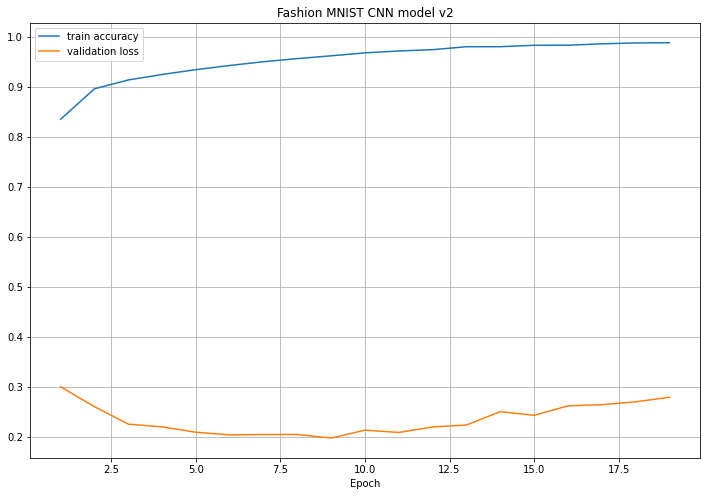

In [22]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.title('Fashion MNIST CNN model v2')
plt.show()